###Import Modul & Library

In [5]:
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, shutil
import warnings
warnings.filterwarnings('ignore')

###Load Drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data_train = '/content/drive/My Drive/dataset/Vegetable Images/train'
data_test = '/content/drive/My Drive/dataset/Vegetable Images/test'
data_val = '/content/drive/My Drive/dataset/Vegetable Images/validation'

image_kategori = os.listdir(data_train)

###Show Image

Menampilkan gambar pertama dari setiap kategori dalam dataset dengan ukuran yang seragam (150x150).

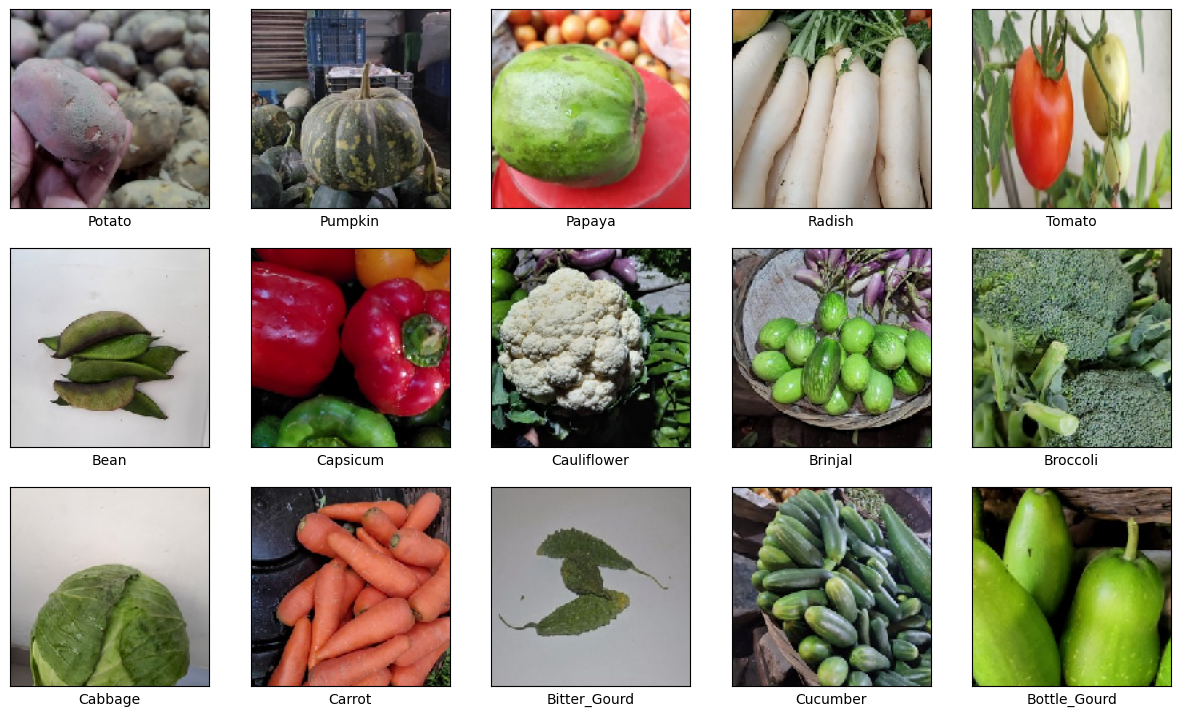

In [11]:
def plot_image(image_kategori):
  plt.figure(figsize=(15, 15))
  for i, label in enumerate(image_kategori):
    image_path = os.path.join(data_train, label)
    images = os.listdir(image_path)
    image_1 = images[0]
    image_1_path = image_path + '/' + image_1
    img = image.load_img(image_1_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(label)
  plt.show()

plot_image(image_kategori)

###Prepare Data

In [12]:
#Prepare Data Train
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
train_img_generator = train_gen.flow_from_directory(data_train, target_size=(150, 150), batch_size=64, class_mode='categorical')

#Prepare Data Test
test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_img_generator = test_gen.flow_from_directory(data_test, target_size=(150, 150), batch_size=64, class_mode='categorical')

#Prepare Data Validation
val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_img_generator = val_gen.flow_from_directory(data_val, target_size=(150, 150), batch_size=64, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [13]:
class_encode = dict([(index, class_name) for class_name, index in train_img_generator.class_indices.items()])
print(class_encode)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


###Modelling

In [7]:
#Memuat model CNN kustom menggunakan Sequential API
model = Sequential()

#Menambahkan Convolutional dan Pooling Layers
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',
                 activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Melakukan Flatten pada feature map sebelum masuk ke Fully Connected Layers
model.add(Flatten())

#Menambahkan Fully Connected Layers (Dense)
model.add(Dense(units=256, activation='relu'))

#Layer output dengan aktivasi softmax untuk klasifikasi 15 kelas
model.add(Dense(units=15, activation='softmax'))

#Menampilkan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 90000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      23,040,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,044,559 (87.91 MB)

 Trainable params: 23,044,559 (87.91 MB)

 Non-trainable params: 0 (0.00 B)

###Training dan Evaluasi

In [8]:
#Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=3)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_img_generator,
                 epochs=20,
                 verbose=1,
                 validation_data=val_img_generator,
                 steps_per_epoch = 15000//64,
                 validation_steps = 3000//64,
                 callbacks=early_stopping)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 3638s 16s/step - accuracy: 0.3681 - loss: 4.8310 - val_accuracy: 0.7527 - val_loss: 0.7838
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.7188 - loss: 0.8299 - val_accuracy: 0.7768 - val_loss: 0.7377
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.8246 - loss: 0.5926 - val_accuracy: 0.8488 - val_loss: 0.4964
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8594 - loss: 0.5100 - val_accuracy: 0.8611 - val_loss: 0.4818
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 115s 282ms/step - accuracy: 0.9162 - loss: 0.3108 - val_accuracy: 0.8709 - val_loss: 0.4039
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9844 - loss: 0.1345 - val_accuracy: 0.8730 - val_loss: 0.4057
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 82s 350ms/step - accuracy: 0.9603 - loss: 0.1637 - val_accuracy: 0.8981 - val_loss: 0.3403
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9688 - loss: 0.1

In [11]:
#Evaluasi model pada data testing
test_loss, test_acc = model.evaluate(test_img_generator, steps=3000//64)
print(f'Test accuracy: {test_acc:.4f}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 630s 14s/step - accuracy: 0.9259 - loss: 0.2933
Test accuracy: 0.9293


###Plot Akurasi dan Loss Model

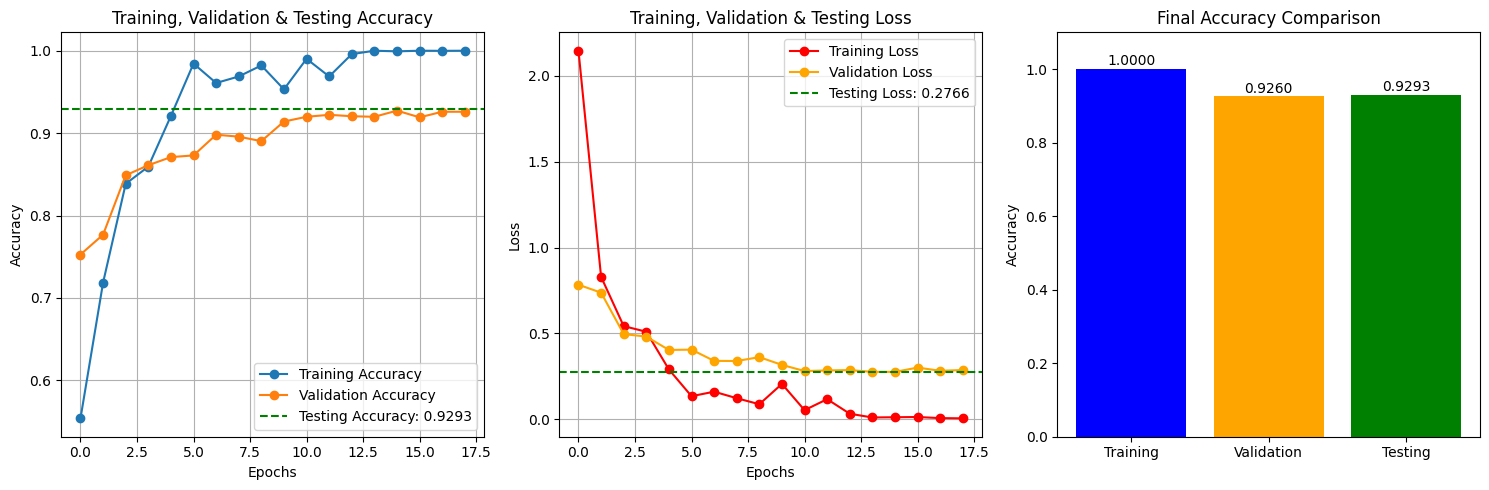

In [12]:
#Ambil data history
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

#Buat plot
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))

#Plot Akurasi
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.axhline(y=test_acc, color='g', linestyle='--', label=f'Testing Accuracy: {test_acc:.4f}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation & Testing Accuracy')
plt.legend()
plt.grid()

#Plot Loss
plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', color='orange')
plt.axhline(y=test_loss, color='g', linestyle='--', label=f'Testing Loss: {test_loss:.4f}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation & Testing Loss')
plt.legend()
plt.grid()

#Plot Accuracy Comparison (Bar Chart)
plt.subplot(1, 3, 3)
final_acc = [acc[-1], val_acc[-1], test_acc]
labels = ['Training', 'Validation', 'Testing']
colors = ['blue', 'orange', 'green']
plt.bar(labels, final_acc, color=colors)
plt.ylabel('Accuracy')
plt.title('Final Accuracy Comparison')
for i, v in enumerate(final_acc):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

###Simpan Model

In [15]:
#Simpan model format SavedModel
model.export('/content/drive/My Drive/dataset/Vegetable Images/saved_model/vegetable_model')

Saved artifact at '/content/drive/My Drive/dataset/Vegetable Images/saved_model/vegetable_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  132141338060624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141338066576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320065040: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [16]:
#Simpan Model format .tfjs
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/content/drive/My Drive/dataset/Vegetable Images/vegetable_tfjs')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


failed to lookup keras version from the file,
    this is likely a weight only file


In [17]:
#Simpan Model formal .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/drive/My Drive/dataset/Vegetable Images/vegetable.tflite', "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp5muc7cwc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  132141338060624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141338066576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320062160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132141320065040: TensorSpec(shape=(), dtype=tf.resource, name=None)


###Inference Model (menggunakan .tflite)

Saving 1009.jpg to 1009.jpg


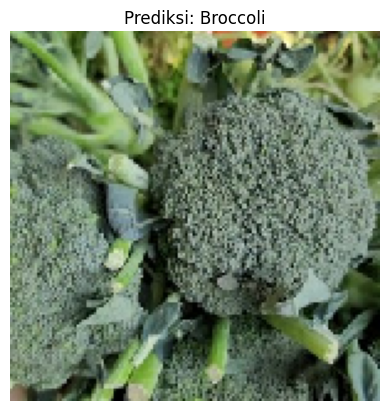

Prediksi model: Broccoli


In [14]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

tflite_model_path = '/content/drive/My Drive/dataset/Vegetable Images/vegetable.tflite'
if not os.path.exists(tflite_model_path):
    raise FileNotFoundError(f"Model TFLite tidak ditemukan di {tflite_model_path}")

#Load model TFLite
def load_tflite_model(tflite_model_path):
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()
    return interpreter

interpreter = load_tflite_model(tflite_model_path)

#Fungsi untuk melakukan prediksi
def predict_image_tflite(interpreter, class_encode):
    uploaded = files.upload()

    for filename in uploaded.keys():
        img_path = filename
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array.astype(np.float32) / 255.0

        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        interpreter.set_tensor(input_details[0]['index'], img_array)
        interpreter.invoke()

        prediction = interpreter.get_tensor(output_details[0]['index'])
        predicted_class = np.argmax(prediction)
        class_name = class_encode.get(predicted_class, "Unknown")

        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Prediksi: {class_name}')
        plt.show()

        print(f'Prediksi model: {class_name}')

predict_image_tflite(interpreter, class_encode)

In [15]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.24.0.34.4
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.